In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [120]:
plants = ["index","Nuclear", "Oil", "Coal", "Coal + CCS", "IGCC", "IGCC + CCS", "CCGT", "CCGT + CCS", "Solid Biomass", 'S Biomass CCS', "BIGCC", "BIGCC + CCS", "Biogas", "Biogas + CCS", "Tidal", "Large Hydro", "Onshore", "Offshore", 'Solar PV', "CSP", "Geothermal", "Wave", "Fuel Cells", "CHP"]

results =  pd.read_csv("/Users/alexanderkell/Documents/PhD/Projects/17-ftt-power-reinforcement/data/outputs/electricity_generated.csv", names=list(range(48)))
# results =  pd.read_csv("/Users/alexanderkell/Documents/PhD/Projects/17-ftt-power-reinforcement/data/outputs/capacity_result.csv", names=list(range(48)))


uk_capacity = results.iloc[:,0:24].reset_index()
ireland_capacity = results.iloc[:,24:].reset_index()

uk_capacity.columns = plants
ireland_capacity.columns = plants
uk_capacity

,index,Nuclear,Oil,Coal,Coal + CCS,IGCC,IGCC + CCS,CCGT,CCGT + CCS,Solid Biomass,...,Tidal,Large Hydro,Onshore,Offshore,Solar PV,CSP,Geothermal,Wave,Fuel Cells,CHP
0,0,0,3115.0,1874.0,0.0,0.0,0.0,0,0.0,0.0,...,0,802.0,0.0,0.0,0.0,0,0,0,0,0
1,1,0,3963.0,1875.0,0.0,0.0,0.0,0,0.0,0.0,...,0,466.0,0.0,0.0,0.0,0,0,0,0,0
2,2,0,4418.0,1789.0,0.0,0.0,0.0,0,0.0,0.0,...,0,682.0,0.0,0.0,0.0,0,0,0,0,0
3,3,0,4873.0,1831.0,0.0,0.0,0.0,0,0.0,0.0,...,0,644.0,0.0,0.0,0.0,0,0,0,0,0
4,4,0,5007.0,1838.0,0.0,0.0,0.0,0,0.0,0.0,...,0,786.0,0.0,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,187,0,-0.0,-0.0,-0.0,-0.0,-0.0,0,-0.0,-0.0,...,0,0.0,46600.0,55973.0,40869.0,0,0,0,0,0
188,188,0,-0.0,-0.0,-0.0,-0.0,-0.0,0,-0.0,-0.0,...,0,0.0,46845.0,56182.0,41108.0,0,0,0,0,0
189,189,0,-0.0,-0.0,-0.0,-0.0,-0.0,0,-0.0,-0.0,...,0,0.0,47259.0,56576.0,41487.0,0,0,0,0,0
190,190,0,-0.0,-0.0,-0.0,-0.0,-0.0,0,-0.0,-0.0,...,0,0.0,47706.0,56898.0,41907.0,0,0,0,0,0


In [121]:
uk_capacity_long = pd.melt(uk_capacity, id_vars="index")

uk_capacity_long['index'] = 2013 + uk_capacity_long['index']/4
uk_capacity_long



,index,variable,value
0,2013.00,Nuclear,0.0
1,2013.25,Nuclear,0.0
2,2013.50,Nuclear,0.0
3,2013.75,Nuclear,0.0
4,2014.00,Nuclear,0.0
...,...,...,...
4603,2059.75,CHP,0.0
4604,2060.00,CHP,0.0
4605,2060.25,CHP,0.0
4606,2060.50,CHP,0.0


Text(0.5, 1.0, 'UK Electricity Generation')

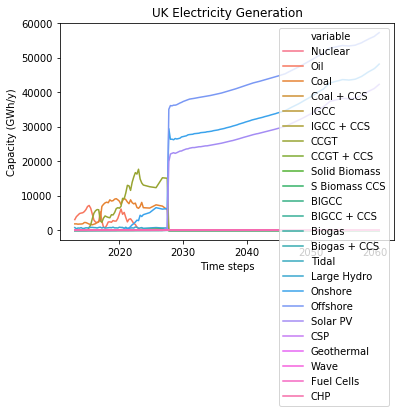

In [122]:
sns.lineplot(data=uk_capacity_long, x="index", y="value", hue="variable")
plt.ylabel("Capacity (GWh/y)")
plt.xlabel("Time steps")
plt.title("UK Electricity Generation")

Text(0.5, 1.0, 'UK Electricity Generation')

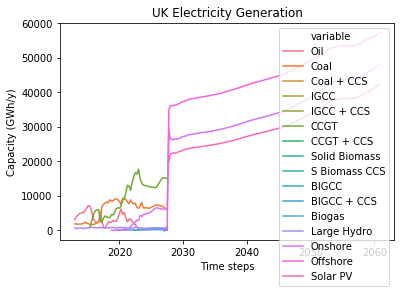

In [123]:
sns.lineplot(data=uk_capacity_long[uk_capacity_long.value>10], x="index", y="value", hue="variable")
plt.ylabel("Capacity (GWh/y)")
plt.xlabel("Time steps")
plt.title("UK Electricity Generation")

In [124]:
ireland_capacity_long = pd.melt(ireland_capacity, id_vars="index")
ireland_capacity_long['index'] = 2013 + ireland_capacity_long['index']/4



ireland_capacity_long

,index,variable,value
0,2013.00,Nuclear,26012.0
1,2013.25,Nuclear,27548.0
2,2013.50,Nuclear,29378.0
3,2013.75,Nuclear,27997.0
4,2014.00,Nuclear,33617.0
...,...,...,...
4603,2059.75,CHP,0.0
4604,2060.00,CHP,0.0
4605,2060.25,CHP,0.0
4606,2060.50,CHP,0.0


Text(0.5, 1.0, 'Ireland Electricity Generation')

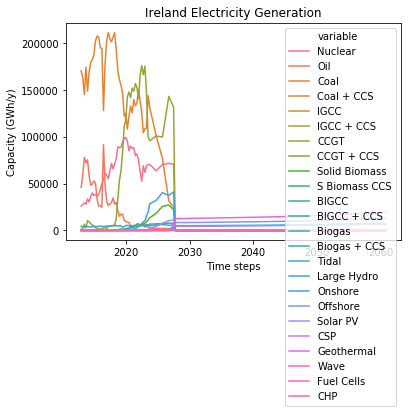

In [125]:
sns.lineplot(data=ireland_capacity_long, x="index", y="value", hue="variable")
plt.ylabel("Capacity (GWh/y)")
plt.xlabel("Time steps")
plt.title("Ireland Electricity Generation")

Text(0.5, 1.0, 'Ireland Electricity Generation')

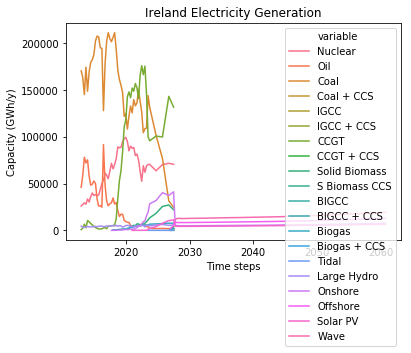

In [126]:
sns.lineplot(data=ireland_capacity_long[(ireland_capacity_long['index']>60)& (ireland_capacity_long['value']>2)], x="index", y="value", hue="variable")
plt.ylabel("Capacity (GWh/y)")
plt.xlabel("Time steps")
plt.title("Ireland Electricity Generation")

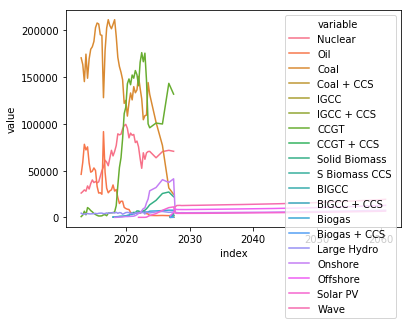

In [127]:
sns.lineplot(data=ireland_capacity_long[ireland_capacity_long.value>10], x="index", y="value", hue="variable")

## Both together

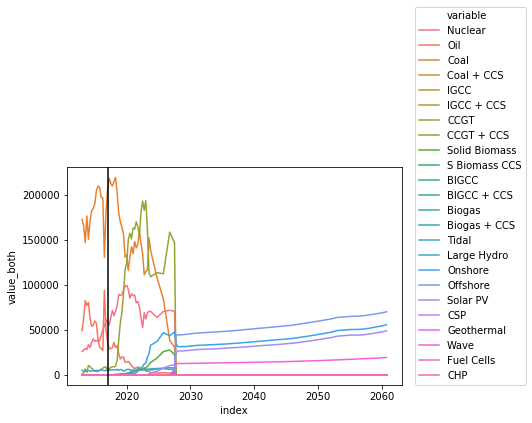

In [128]:
uk_capacity_long
ireland_capacity_long

both_capacity_long = uk_capacity_long.merge(ireland_capacity_long, on=["index",'variable'])
both_capacity_long['value_both'] = both_capacity_long['value_x'] +  both_capacity_long['value_y']
# both_capacity_long

sns.lineplot(data=both_capacity_long, x="index", y="value_both", hue="variable")
plt.legend(loc=(1.04,0))
plt.axvline(x=2017, color="black")
both_capacity_long.to_csv("/Users/alexanderkell/Documents/PhD/Projects/17-ftt-power-reinforcement/notebooks/data/processed/both_capacity_long.csv")

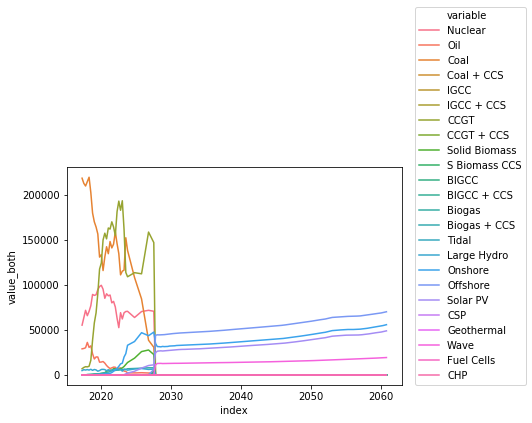

In [129]:

sns.lineplot(data=both_capacity_long[both_capacity_long['index']>2017], x="index", y="value_both", hue="variable")
plt.legend(loc=(1.04,0))


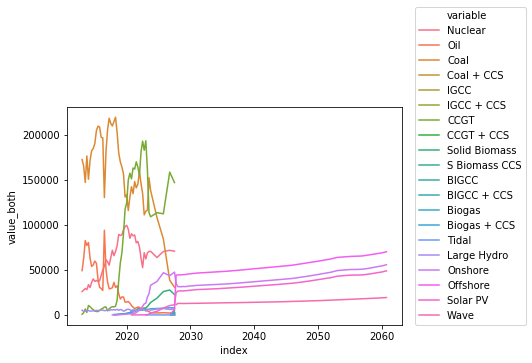

In [130]:
uk_capacity_long
ireland_capacity_long

both_capacity_long = uk_capacity_long.merge(ireland_capacity_long, on=["index",'variable'])
both_capacity_long['value_both'] = both_capacity_long['value_x'] +  both_capacity_long['value_y']
both_capacity_long
sns.lineplot(data=both_capacity_long[(both_capacity_long['index']>60) & (both_capacity_long['value_both']>1)], x="index", y="value_both", hue="variable")
plt.legend(loc=(1.04,0))



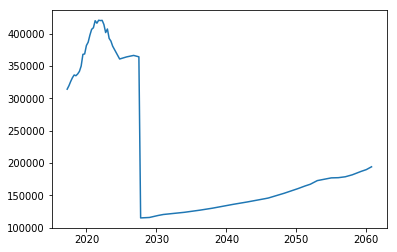

In [131]:
plt.plot(both_capacity_long[both_capacity_long['index']>2017].groupby("index").value_both.sum())

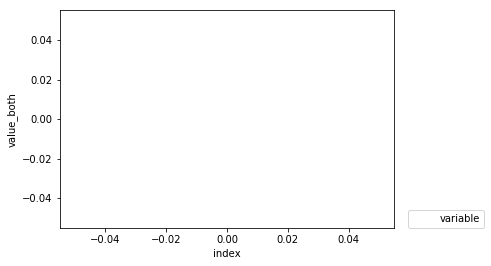

In [132]:
sns.lineplot(data=both_capacity_long[(both_capacity_long['index']<200) & (both_capacity_long['value_both']>2)], x="index", y="value_both", hue="variable")
plt.legend(loc=(1.04,0))

# Market Share

In [133]:
def get_data(filename):
    plants = ["index","Nuclear", "Oil", "Coal", "Coal + CCS", "IGCC", "IGCC + CCS", "CCGT", "CCGT + CCS", "Solid Biomass", 'S Biomass CCS', "BIGCC", "BIGCC + CCS", "Biogas", "Biogas + CCS", "Tidal", "Large Hydro", "Onshore", "Offshore", 'Solar PV', "CSP", "Geothermal", "Wave", "Fuel Cells", "CHP"]

    results =  pd.read_csv("/Users/alexanderkell/Documents/PhD/Projects/17-ftt-power-reinforcement/data/outputs/{}.csv".format(filename), names=list(range(48)))
    uk_result = results.iloc[:,0:24].reset_index()
    ireland_result = results.iloc[:,24:].reset_index()

    uk_result.columns = plants
    ireland_result.columns = plants
    
    ireland_capacity_long = pd.melt(ireland_result, id_vars="index")
    uk_capacity_long = pd.melt(uk_result, id_vars="index")
    
    return (uk_capacity_long, ireland_capacity_long)
    
    

In [134]:
uk_market_share, ireland_market_share = get_data("market_share")

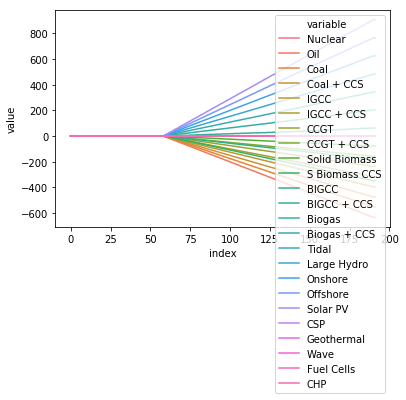

In [135]:
sns.lineplot(data=uk_market_share, x="index", y="value", hue="variable")

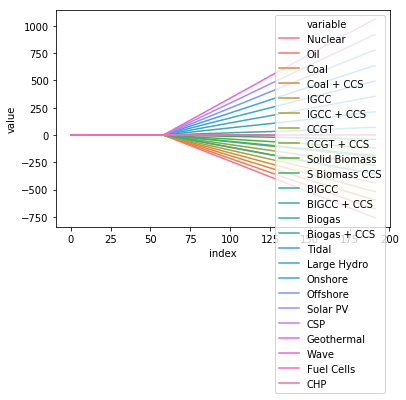

In [136]:
sns.lineplot(data=ireland_market_share, x="index", y="value", hue="variable")